### Machine Learning Time Series Forecasting for BTC Market

I intend to appy different Machine Learning models to historical Bitcoin price data
to predict future value applitying Time Series 

Data has been collected from https://www.cryptodatadownload.com/

References:

    https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
    https://www.kaggle.com/jessevent/all-crypto-currencies/kernels
    https://www.youtube.com/watch?v=970im6yAmhE (min 10)
    
    

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# We are using Kraken exchange 1h timeframe data.

data = pd.read_csv('Kraken_BTCUSD_1h.csv')
data.shape

(23675, 2)

In [13]:
# Dataframe dressing

data= data.reset_index()
headers = data.iloc[0]
data = pd.DataFrame(data.values[1:], columns=headers)
data = data.iloc[::-1]

data['Volume USD'] = data['Volume USD'].astype(float)
data['Close'] = data['Close'].astype(float)

data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
23673,2017-07-01 11-AM,BTCUSD,2491.97,2494.93,2483.32,2494.87,163.92,407837.90
23672,2017-07-01 12-PM,BTCUSD,2494.87,2494.87,2470.86,2477.97,80.93,200771.78
23671,2017-07-01 01-PM,BTCUSD,2477.97,2478.96,2444.44,2444.44,168.69,415839.42
23670,2017-07-01 02-PM,BTCUSD,2444.44,2463.6,2437.26,2448.99,119.59,292801.90
23669,2017-07-01 03-PM,BTCUSD,2448.99,2465.95,2438.99,2457.84,109.53,268333.15


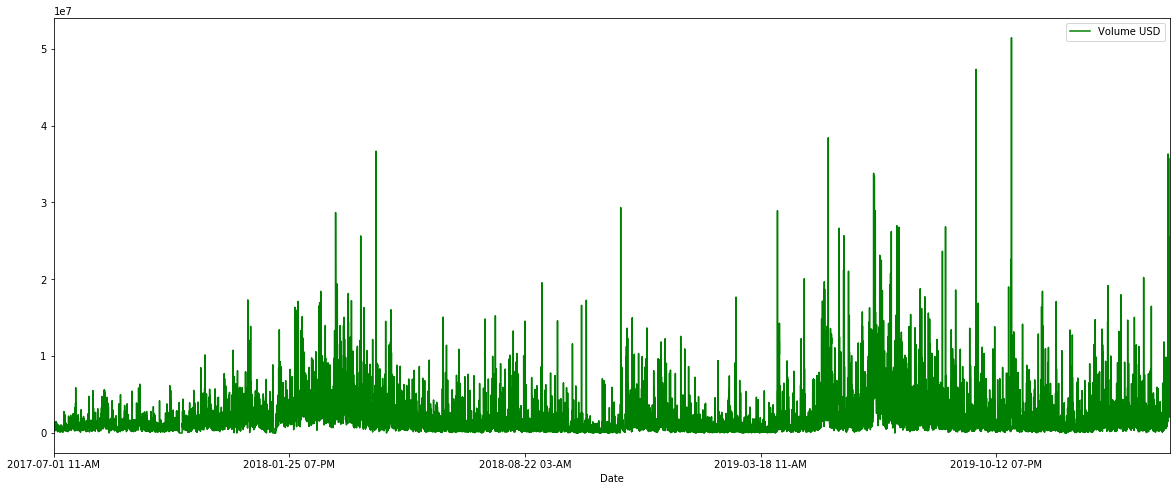

In [17]:
volume = data.plot(x='Date', y='Volume USD', figsize=(20,8), color='g')


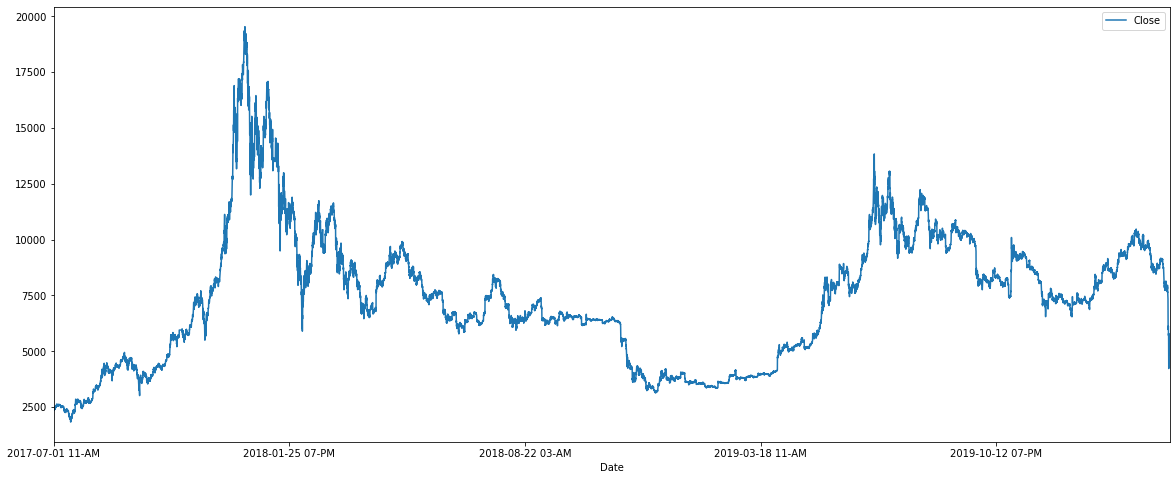

In [18]:
price = data.plot(x='Date', y='Close', figsize=(20,8))

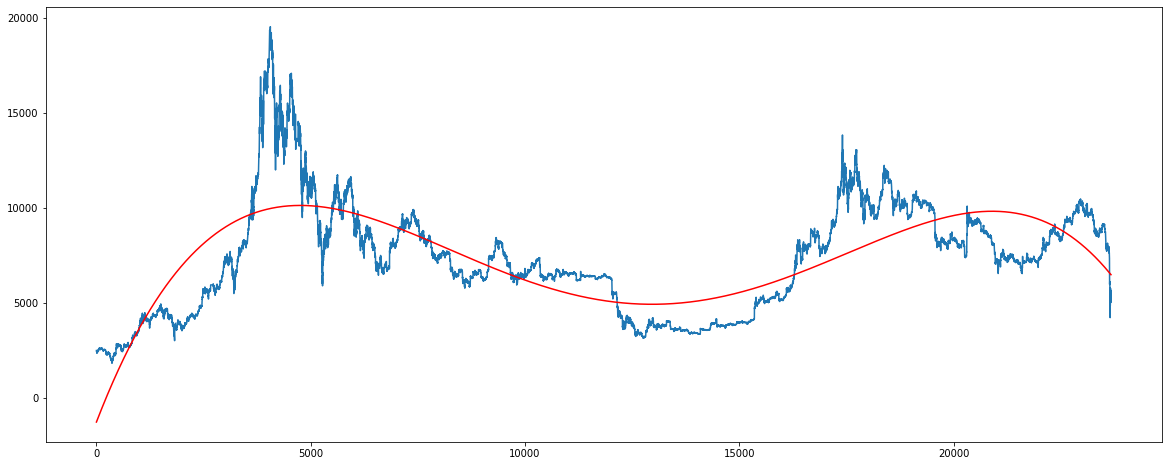

In [20]:
# Fitting a polynomial curve


xpoly = np.linspace(1, len(data['Date']), len(data['Date']))
y = data['Close']

p5 = np.polyfit(xpoly, y, 5)
ypoly = np.polyval(p5, xpoly)

plt.figure(figsize=(20,8))
plt.plot(xpoly, y)
plt.plot(xpoly, ypoly, color='r')